In [61]:
import matplotlib.pyplot as plt
import networkx as nx


<h1> ZADANIE 1

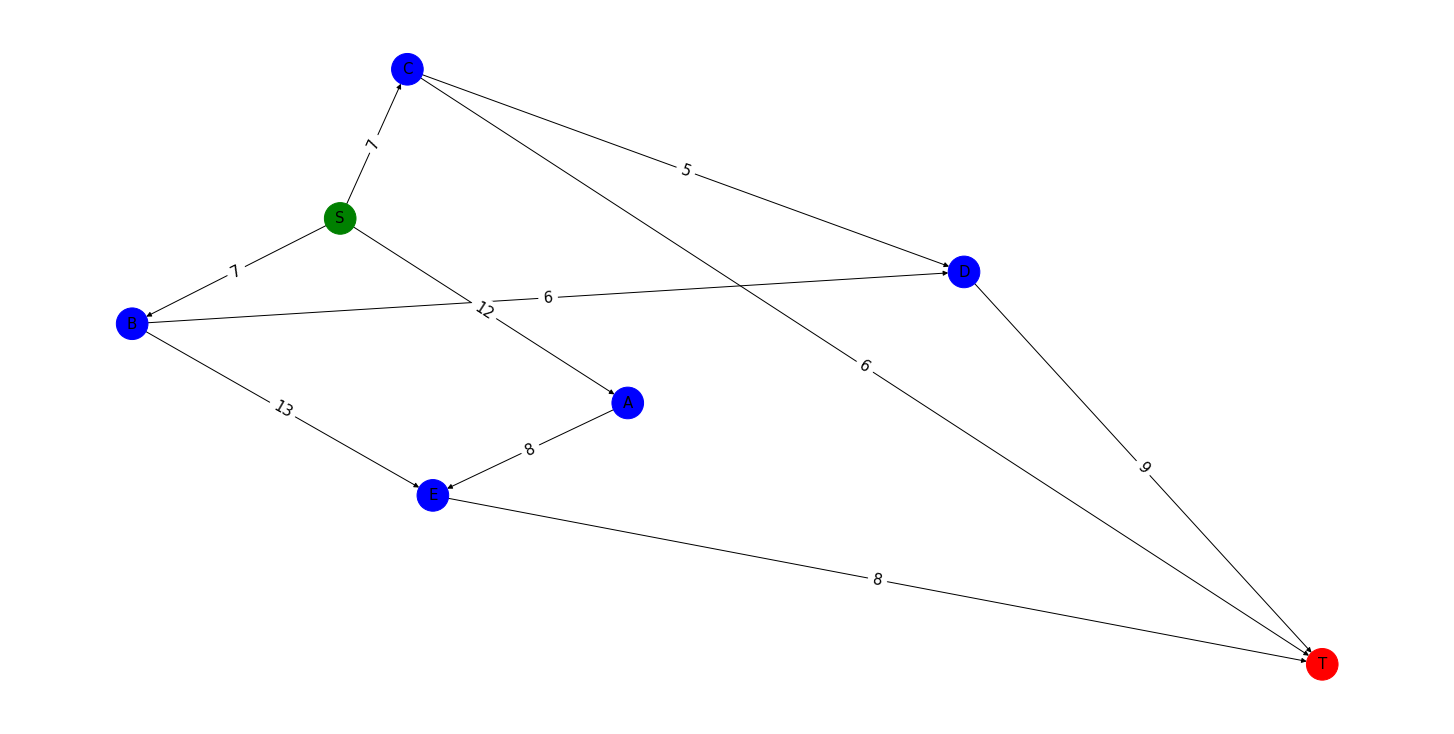

In [62]:
V = ["S","T","A","B","C","D","E"]
E_start = [["S", "A", 12], ["S", "B", 7], ["S", "C", 7],
           ["A", "E", 8],
           ["B", "E", 13], ["B", "D", 6],
           ["C", "D", 5], ["C","T",6],
           ["D", "T", 9],
           ["E", "T", 8]]

E_used = [["S", "A", 12], ["S", "B", 7], ["S", "C", 7],
           ["A", "E", 8],
           ["B", "E", 13], ["B", "D", 6],
           ["C", "D", 5], ["C","T",6],
           ["D", "T", 9],
           ["E", "T", 8]]

R = {("S", "A"): 0, ("S", "B"): 0, ("S", "C"): 0,
     ("A", "E"): 0,
     ("B", "E"): 0, ("B", "D"): 0,
     ("C", "D"): 0, ("C","T"):0,
     ("D", "T"): 0,
     ("E", "T"): 0}


start = nx.DiGraph()

for v in V:
    start.add_node(v)

for e in E_start:
    start.add_edge(e[0], e[1], weight = e[2])


color_map = ["green","red","blue","blue","blue","blue","blue"]

pos = nx.spring_layout(start, seed=2405) #25

plt.figure(1,figsize=(20,10))
labels = nx.get_edge_attributes(start, 'weight')
nx.draw(start, pos, with_labels=True, node_color=color_map, node_size=1000, font_size =15, font_weight='normal')
nx.draw_networkx_edge_labels(start, pos, edge_labels=labels, font_size =15)
plt.show()


In [63]:
def show_plot(vertex, used_flow, unused_flow, all_flow, pos, color_map):
    """Argumenty:
        vertex — lista wierzchołków
        used_flow — słownik wykorzystanych przepływów
        unused_flow — lista dostępnych przepływów
        all_flow — lista całkowitych przepływów,
        pos — pozycje dla grafów wedle grafu startowego
        color_map — mapa kolorów dla grafu
    Funkcja rysuje graf przepływu, który pokazuje pozostałe przepływy i graf rezydualny"""

    residual = nx.DiGraph()
    flow = nx.DiGraph()
    for v in vertex:
        residual.add_node(v)
        flow.add_node(v)
    for e in range(len(all_flow)):
        flow.add_edge(unused_flow[e][0], unused_flow[e][1], weight=unused_flow[e][2])
        residual.add_edge(all_flow[e][0], all_flow[e][1], weight=all_flow[e][2])
        residual.add_edge(all_flow[e][1], all_flow[e][0])

    flow_labels = nx.get_edge_attributes(flow, 'weight')
    labels = nx.get_edge_attributes(residual, 'weight')
    for l in labels:
        labels[l]=f"{used_flow[l]}/{labels[l]}"


    plt.figure(2, figsize=(20,10))
    nx.draw(flow, pos, with_labels=True, node_color=color_map, node_size=1000, font_size=15, font_weight='normal')
    nx.draw_networkx_edge_labels(flow, pos, edge_labels=flow_labels, font_size=15)
    plt.title("sieć przepływowa", fontsize=50)
    plt.show()

    plt.figure(3,figsize=(20,10))
    nx.draw(residual, pos, with_labels=True, node_color=color_map, node_size=1000, font_size =15, font_weight='normal',connectionstyle='arc3, rad = 0.05')
    nx.draw_networkx_edge_labels(residual, pos, edge_labels=labels, font_size=15)
    plt.title("sieć rezydualna", fontsize=50)
    plt.show()


def find_new_path_old(unused_flow):
    all_path = list(nx.all_simple_paths(start,"S","T"))
    for path in all_path:
        helper = []
        for i in range(len(path)-1):
            helper.append(unused_flow[path[i],path[i+1]])
        if min(helper)!= 0:
            return path
    return False


def find_new_path_BFS(unused_flow):
    visited = []
    queue = [{"aktualny":"S","poprzednicy":[]}]
    while queue:
        x = queue[0] # pobieram pierwszego z kolejki
        for edge in unused_flow:
            if edge[0]==x["aktualny"] and edge[2] != 0:
                temp_list = []
                for p in x["poprzednicy"]:
                    temp_list.append(p)
                temp_list.append(x["aktualny"])
                if edge[1] not in temp_list:
                    queue.append({"aktualny":edge[1],"poprzednicy":temp_list}) # lista sąsiadów
        visited.append(x)
        queue.remove(x)


    for path in visited:
        if path["aktualny"] == "T":
            path["poprzednicy"].append("T")
            return path["poprzednicy"]

    return None



def  Edmonds_Karp(vertex, used_flow, unused_flow, all_flow, pos, color_map):
    """Argumenty:
        vertex — lista wierzchołków
        used_flow — słownik wykorzystanych przepływów
        unused_flow — lista dostępnych przepływów
        all_flow — lista całkowitych przepływów,
        pos — pozycje dla grafów wedle grafu startowego
        color_map — mapa kolorów dla grafu"""
    while True:
        show_plot(vertex, used_flow, unused_flow, all_flow, pos, color_map)
        path = find_new_path_BFS(unused_flow)
        print(path)
        if path:
            chosen_path_flow = []
            for i in range(len(path)-1):
                for x in unused_flow:
                    if x[0]==path[i] and x[1] == path[i+1]:
                        chosen_path_flow.append(x[2])
            min_flow = min(chosen_path_flow)

            for i in range(len(path)-1):
                for x in unused_flow:
                    if x[0]==path[i] and x[1] == path[i+1]:
                        x[2] -= min_flow
                        used_flow[path[i],path[i+1]] += min_flow
        else:
            break

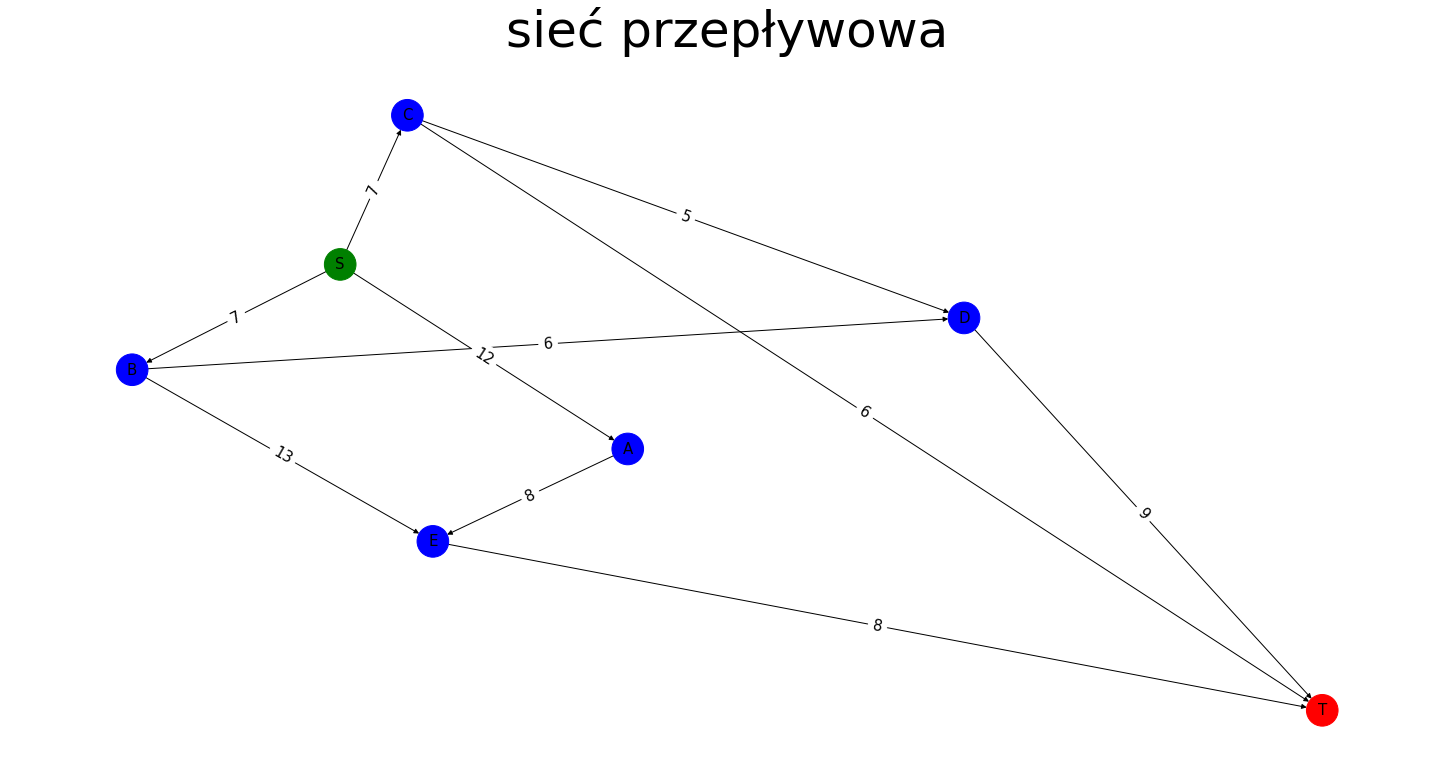

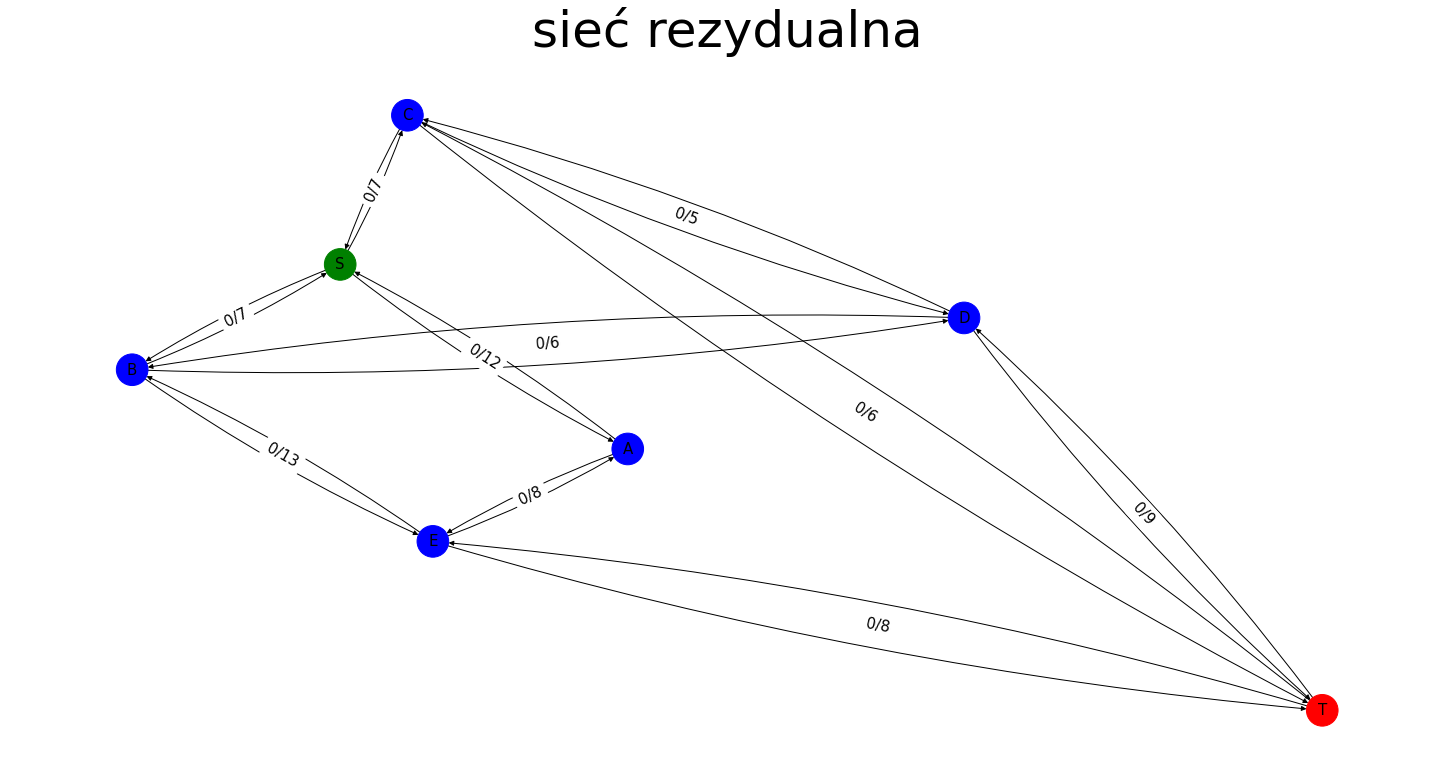

['S', 'C', 'T']


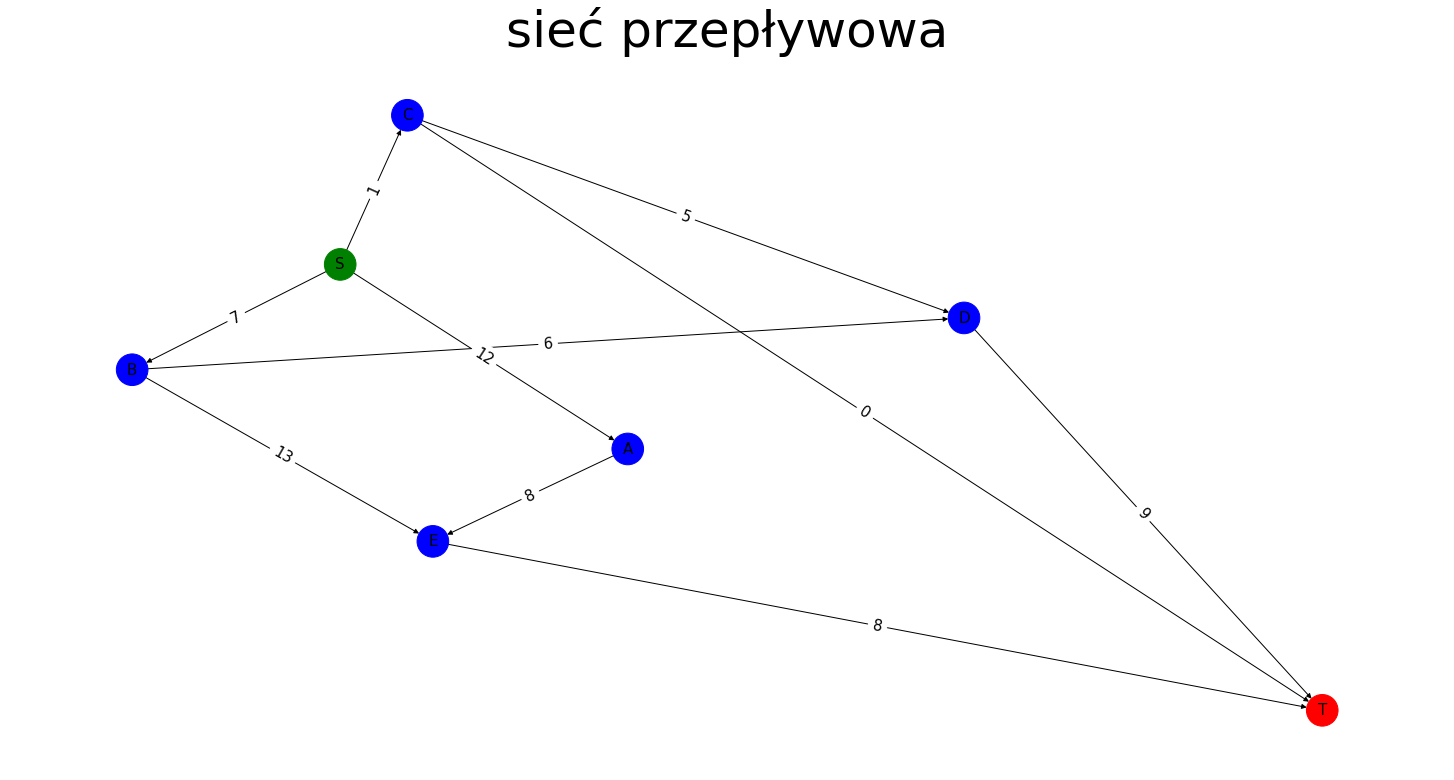

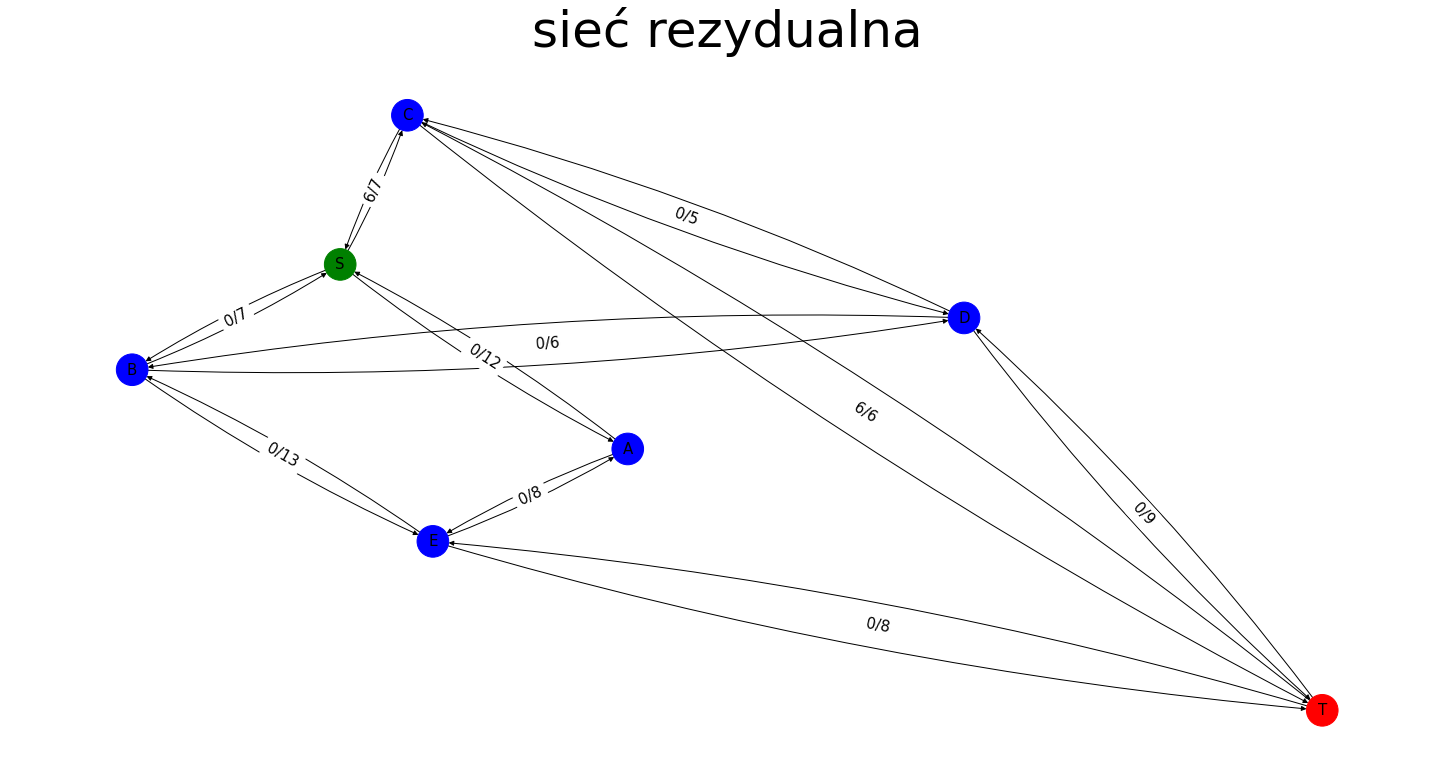

['S', 'A', 'E', 'T']


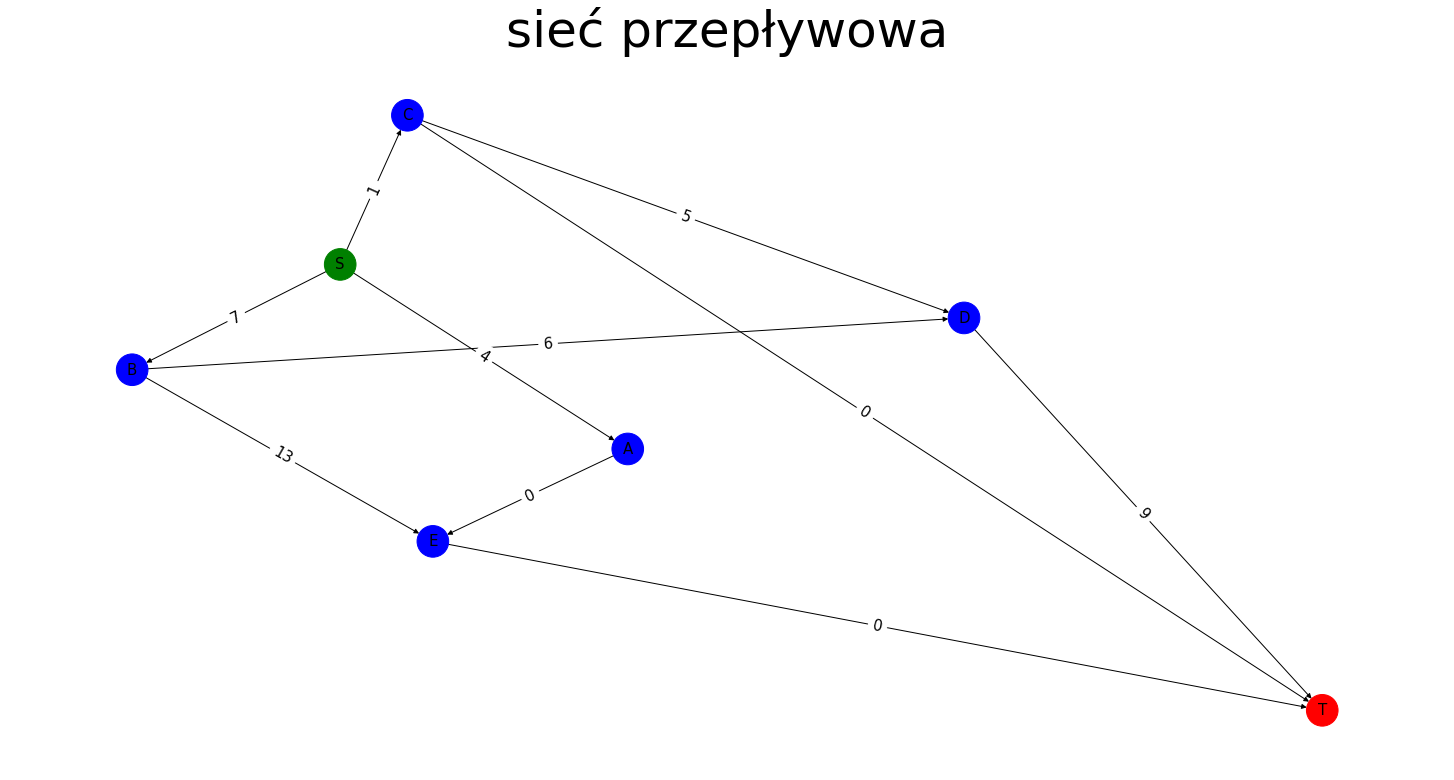

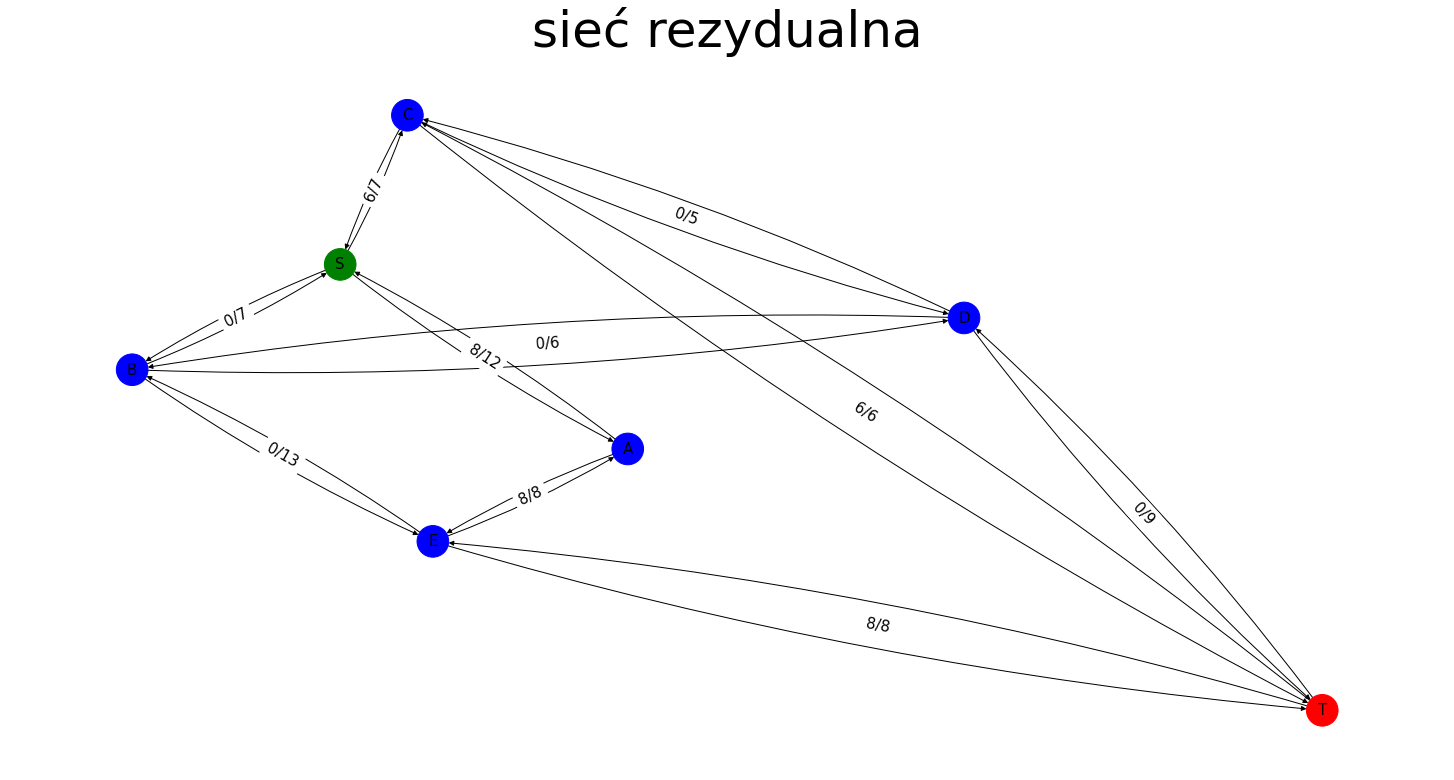

['S', 'B', 'D', 'T']


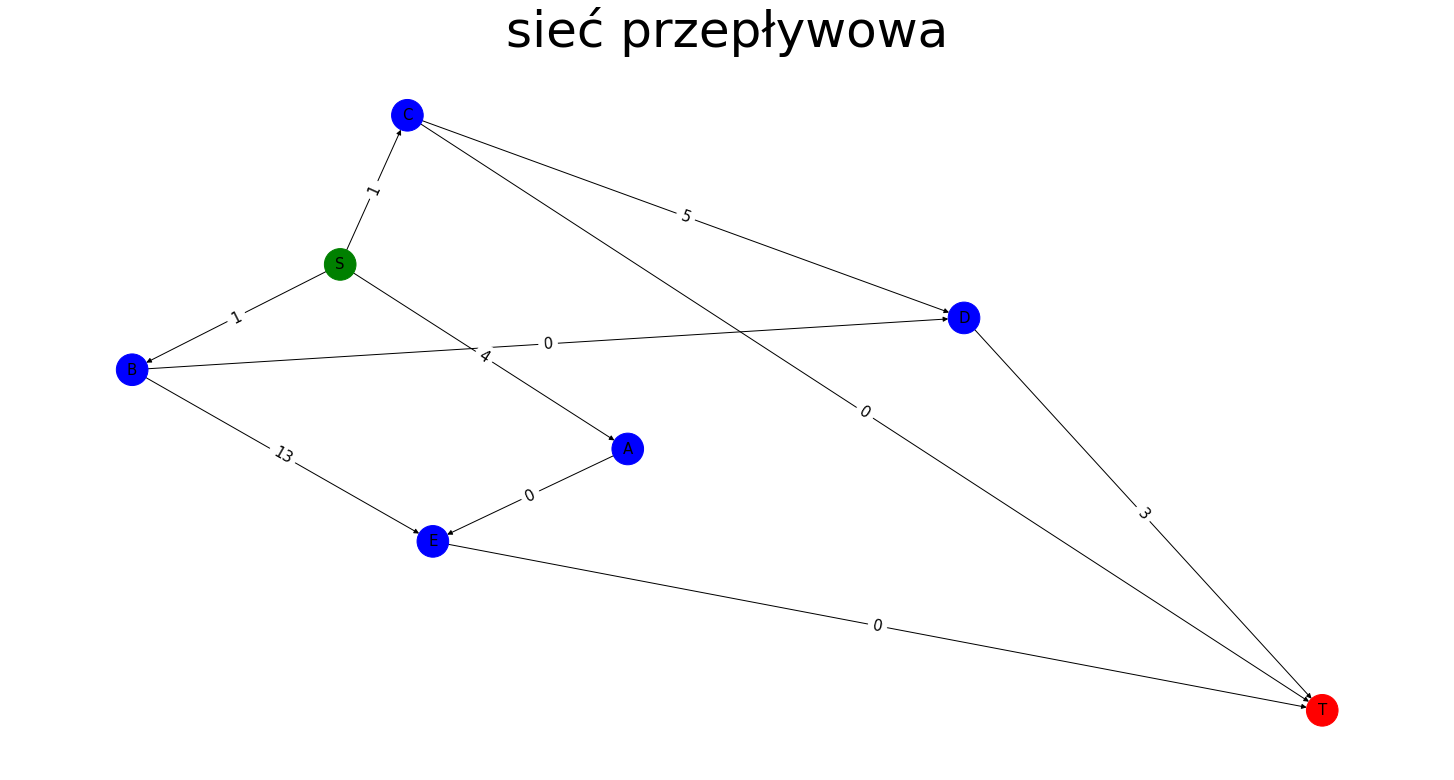

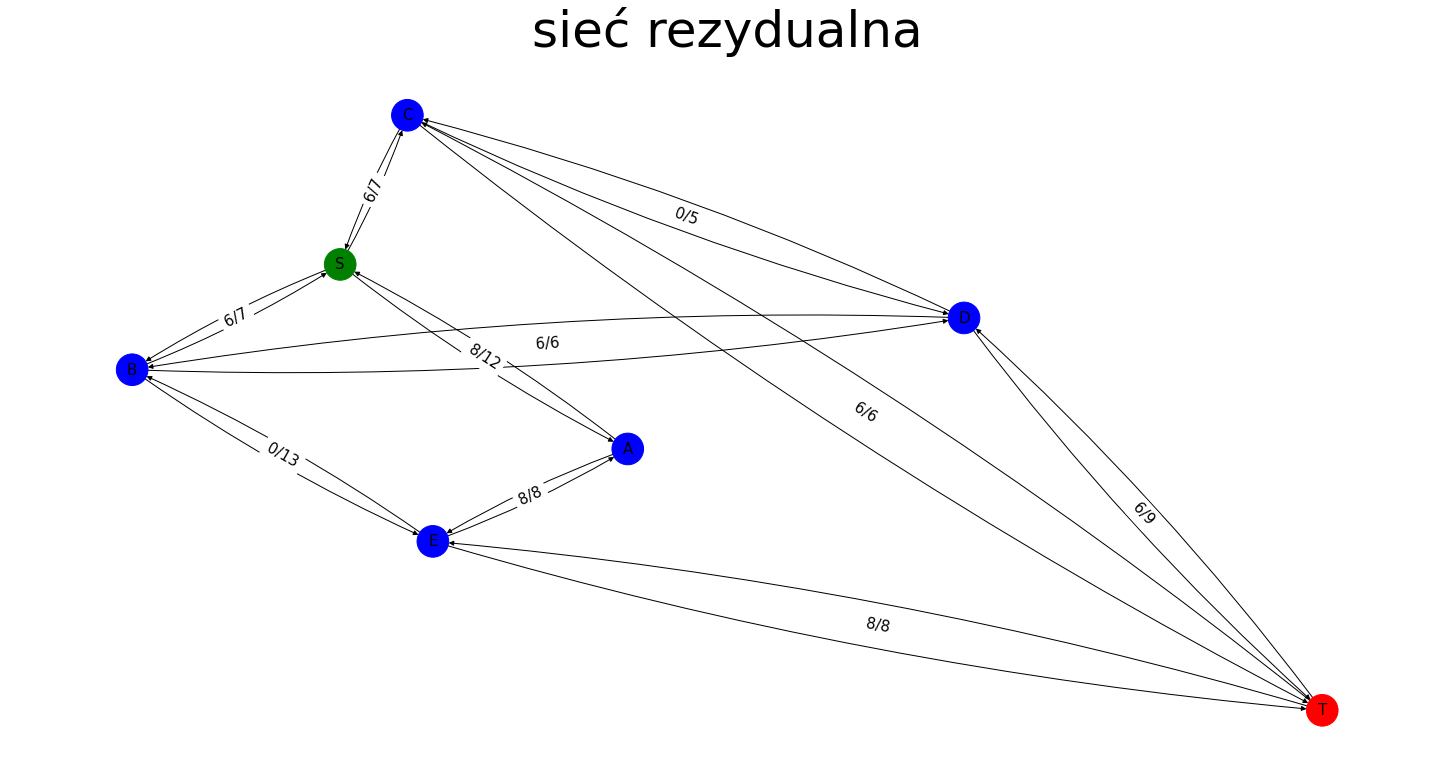

['S', 'C', 'D', 'T']


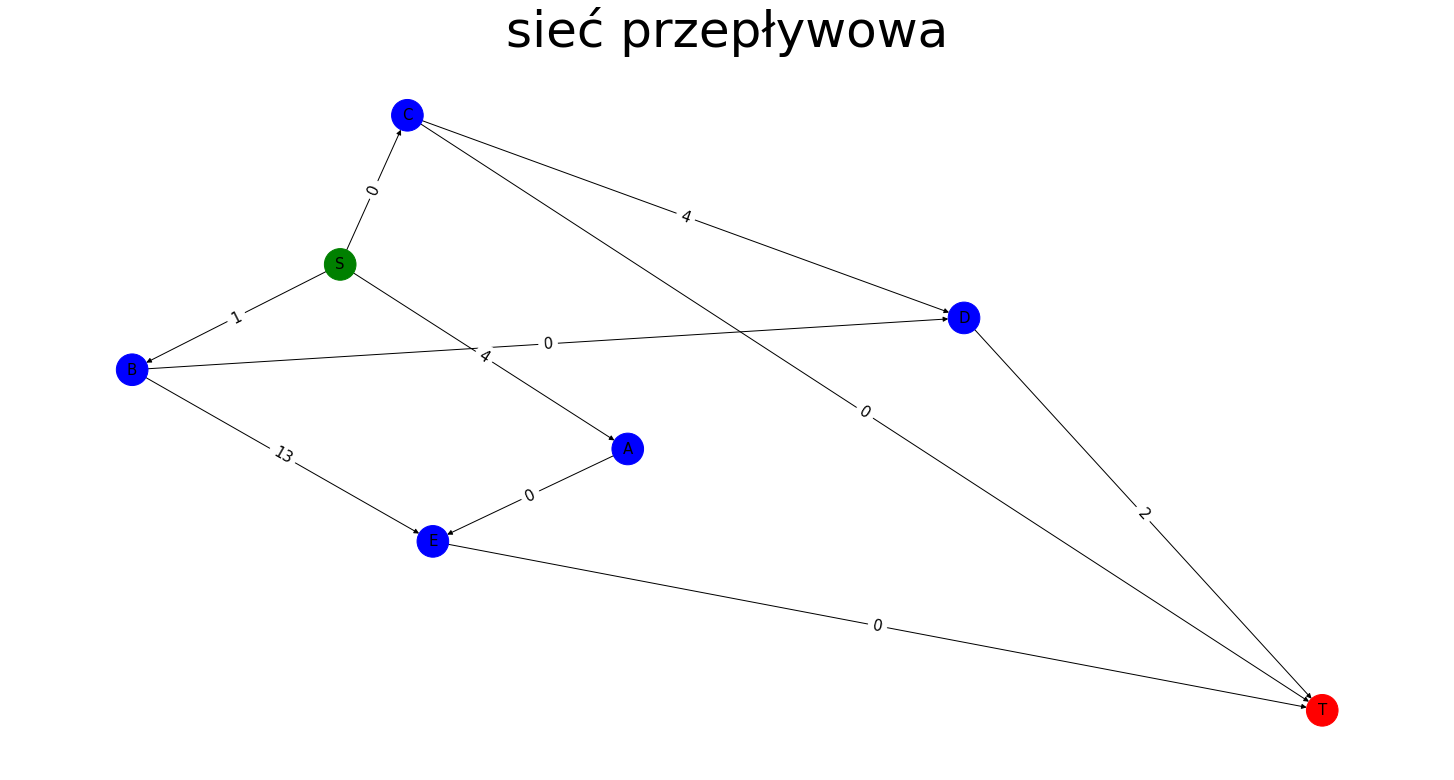

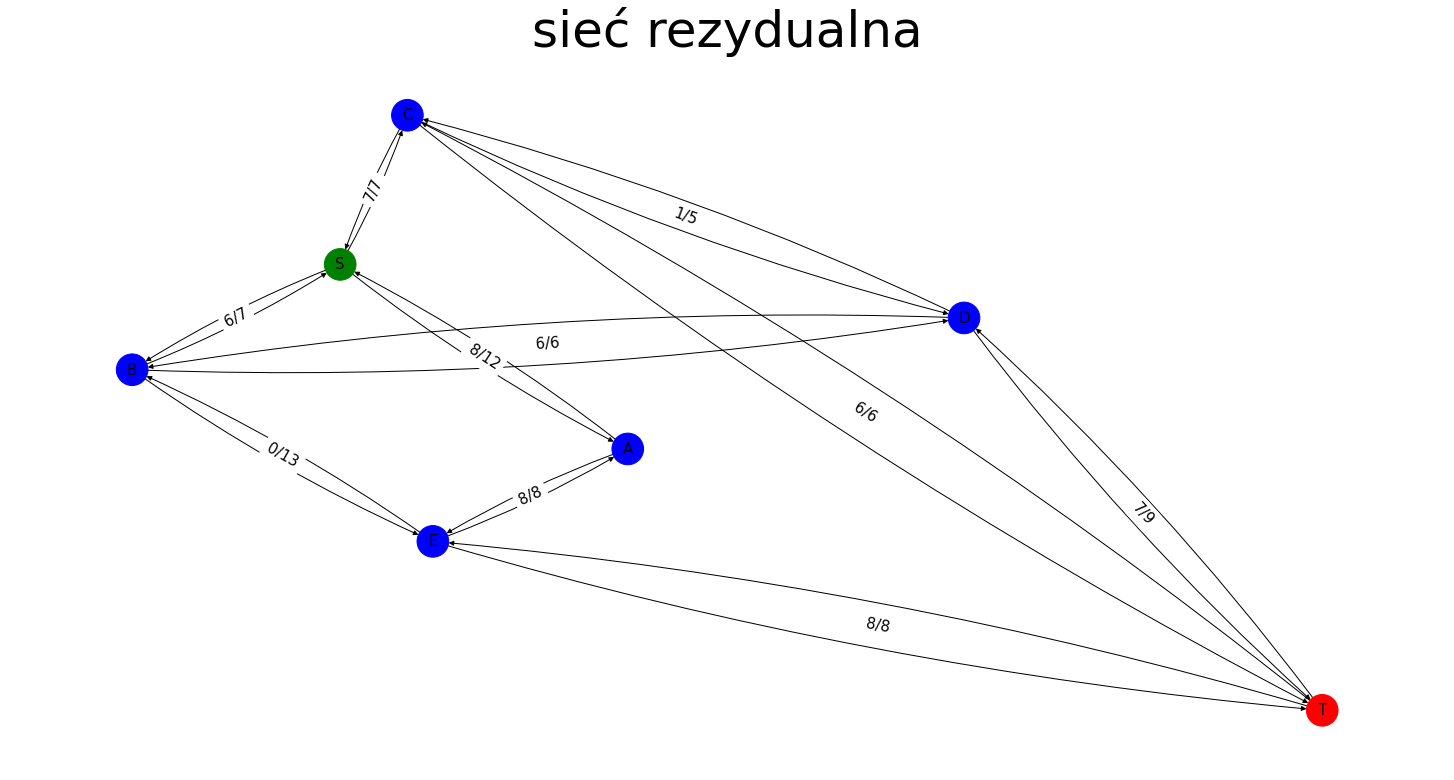

None


In [65]:
Edmonds_Karp(V, R, E_used, E_start, pos, color_map)